In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [3]:
df = pd.read_csv("/content/Netflix Dataset.csv")
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


# Task
Analyze the provided Netflix dataset to identify content trends and strategic insights between 2008 and 2021, focusing on content type, temporal trends, genre, geographical distribution, ratings, and key personnel, and provide data-driven strategic recommendations.

## Data cleaning and preprocessing

### Subtask:
Handle missing values and convert `Release_Date` to a datetime format.


**Reasoning**:
Check for missing values in each column and then handle them as per the instructions for each column.



In [6]:
print("Missing values before handling:")
print(df.isnull().sum())

df['Director'].fillna('Unknown', inplace=True)
df['Cast'].fillna('Unknown', inplace=True)
df['Country'].fillna('Unknown', inplace=True)

# Fill missing 'Rating' values with the mode
mode_rating = df['Rating'].mode()[0]
df['Rating'].fillna(mode_rating, inplace=True)

# Convert 'Release_Date' to datetime, coercing errors
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Drop rows where 'Release_Date' conversion resulted in NaT
df.dropna(subset=['Release_Date'], inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())

df.info()

Missing values before handling:
Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
dtype: int64

Missing values after handling:
Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 7691 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7691 non-null   object        
 1   Category      7691 non-null   object        
 2   Title         7691 non-null   object        
 3   Director      7691 non-null   object        
 4   Cast          7691 non-null   object        
 5   Country       7691 non-null   object        
 6   Release

/tmp/ipython-input-2912795963.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Director'].fillna('Unknown', inplace=True)
/tmp/ipython-input-2912795963.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

### Top 10 Countries by Content on Netflix

This bar plot shows the distribution of content (Movies and TV Shows) across the top 10 countries with the highest number of titles available on Netflix.

/tmp/ipython-input-4245426987.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='viridis')


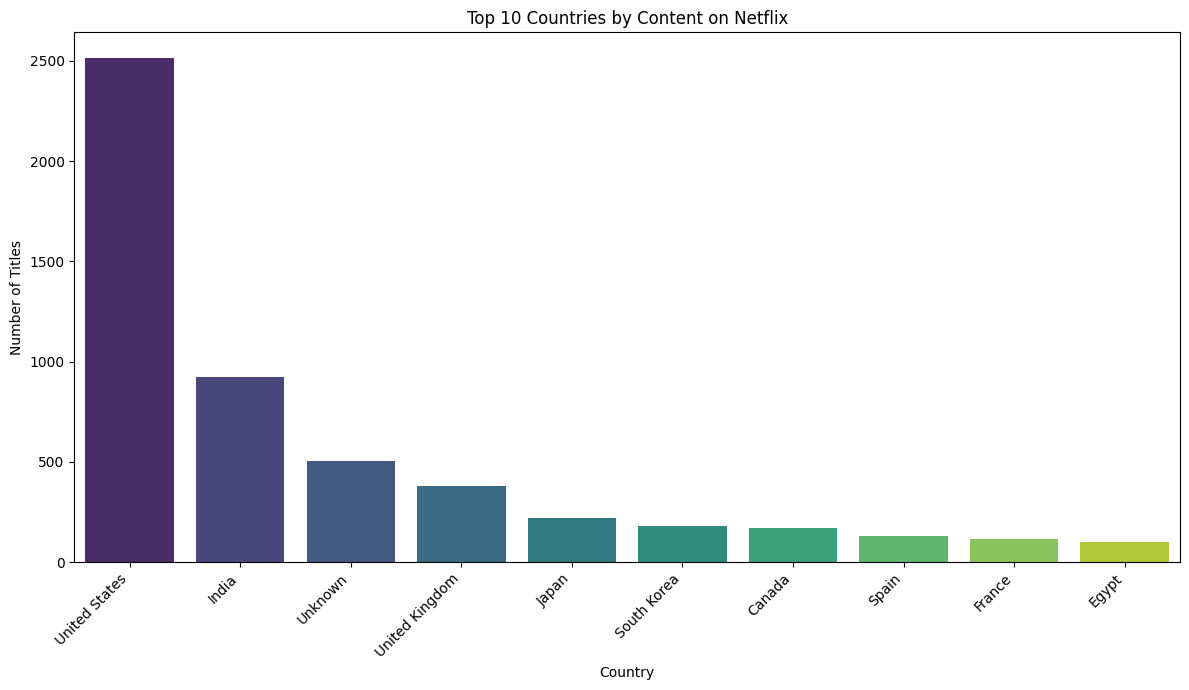

In [28]:
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='viridis')
plt.title('Top 10 Countries by Content on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Content type analysis

### Subtask:
Analyze the distribution of Movies vs. TV Shows.


**Reasoning**:
Count the occurrences of each category and visualize the distribution using a bar plot.



Distribution of Movies vs. TV Shows:
Category
Movie      5379
TV Show    2312
Name: count, dtype: int64


/tmp/ipython-input-191125054.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


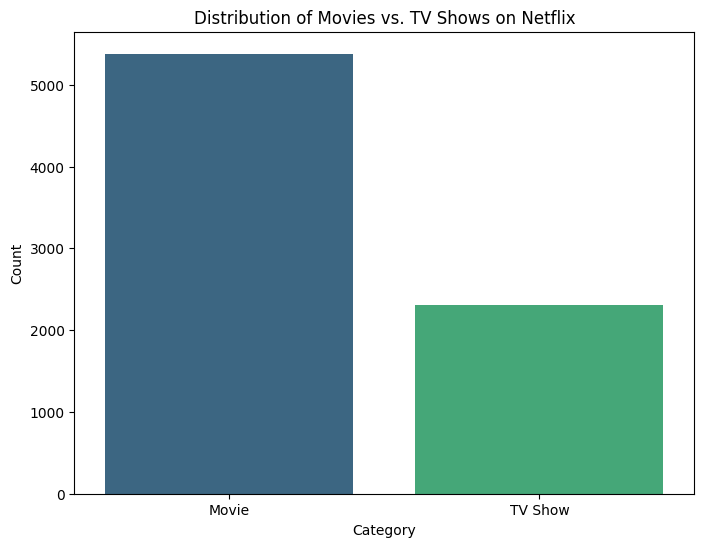

In [8]:
category_counts = df['Category'].value_counts()
print("Distribution of Movies vs. TV Shows:")
print(category_counts)

plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of Movies vs. TV Shows on Netflix')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

## Temporal trend analysis

### Subtask:
Examine how the number of movies and TV shows added to Netflix changed over time (monthly/yearly).


**Reasoning**:
Extract the year and month from the `Release_Date` column, create new columns for 'release_year' and 'release_month', group by year and category to count entries, create separate dataframes, and plot the yearly trend for movies and TV shows.



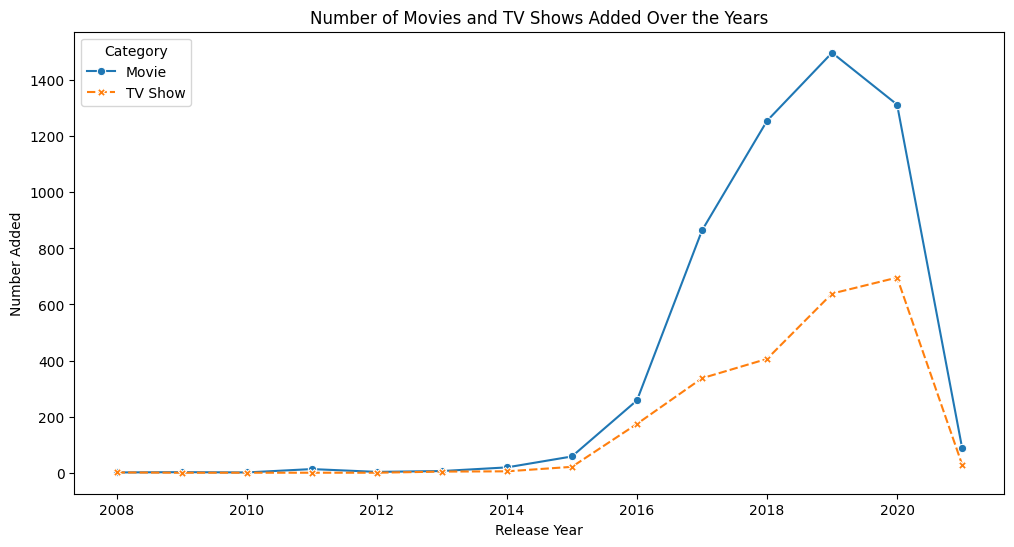

In [10]:
df['release_year'] = df['Release_Date'].dt.year
df['release_month'] = df['Release_Date'].dt.month

yearly_counts = df.groupby(['release_year', 'Category']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_counts, markers=True)
plt.title('Number of Movies and TV Shows Added Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number Added')
plt.legend(title='Category')
plt.show()

**Reasoning**:
Group the DataFrame by 'release_month' and 'Category', count the number of entries for each group, and plot the monthly trend for movies and TV shows.



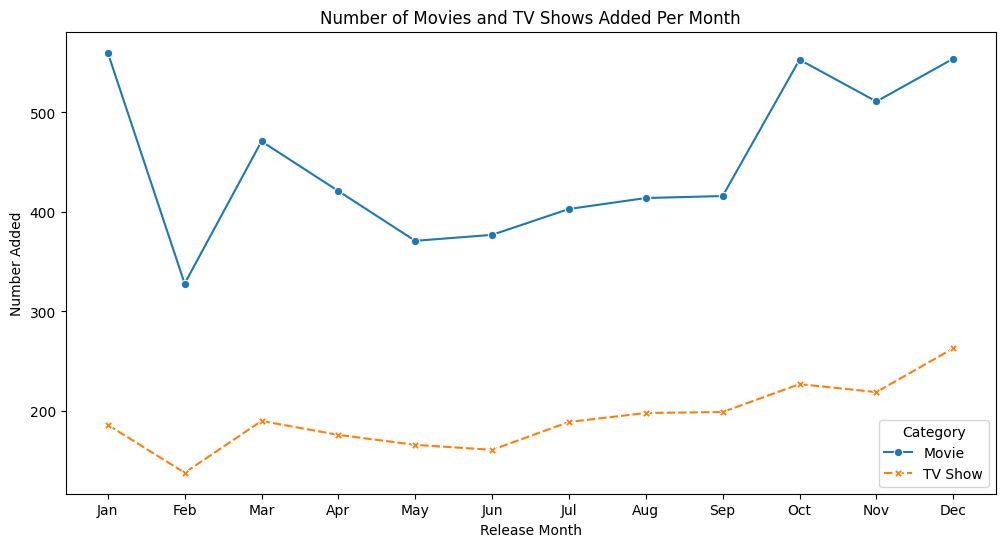

In [12]:
monthly_counts = df.groupby(['release_month', 'Category']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_counts, markers=True)
plt.title('Number of Movies and TV Shows Added Per Month')
plt.xlabel('Release Month')
plt.ylabel('Number Added')
plt.legend(title='Category')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

## Genre analysis

### Subtask:
Identify the most popular genres for both movies and TV shows.


**Reasoning**:
Filter the DataFrame into Movies and TV Shows, split the 'Type' column to get individual genres, and count the occurrences of each genre for both categories.



In [14]:
movies_df = df[df['Category'] == 'Movie'].copy()
tv_shows_df = df[df['Category'] == 'TV Show'].copy()

movies_genres = movies_df['Type'].str.split(', ').explode()
tv_shows_genres = tv_shows_df['Type'].str.split(', ').explode()

top_movies_genres = movies_genres.value_counts().head(15)
top_tv_shows_genres = tv_shows_genres.value_counts().head(15)

print("Top 15 Movie Genres:")
print(top_movies_genres)
print("\nTop 15 TV Show Genres:")
print(top_tv_shows_genres)

Top 15 Movie Genres:
Type
International Movies        2437
Dramas                      2108
Comedies                    1472
Documentaries                786
Action & Adventure           721
Independent Movies           675
Children & Family Movies     532
Romantic Movies              531
Thrillers                    492
Stand-Up Comedy              329
Music & Musicals             321
Horror Movies                312
Sci-Fi & Fantasy             218
Sports Movies                196
Classic Movies               103
Name: count, dtype: int64

Top 15 TV Show Genres:
Type
International TV Shows       1176
TV Dramas                     680
TV Comedies                   494
Crime TV Shows                416
Kids' TV                      396
Docuseries                    338
Romantic TV Shows             327
British TV Shows              214
Reality TV                    211
Korean TV Shows               146
Anime Series                  144
TV Action & Adventure         142
Spanish-Language

**Reasoning**:
Visualize the top genres for both movies and TV shows using bar plots to easily compare the popularity of different genres within each category.



/tmp/ipython-input-983353608.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_movies_genres.index, y=top_movies_genres.values, palette='viridis')


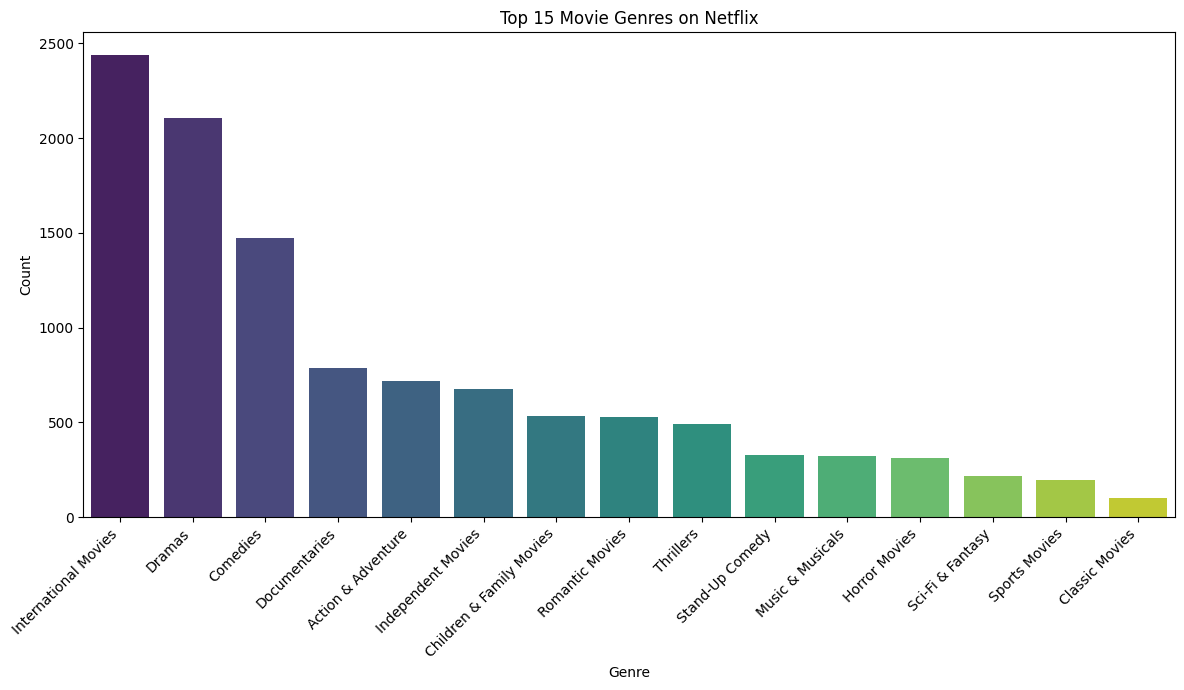

/tmp/ipython-input-983353608.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tv_shows_genres.index, y=top_tv_shows_genres.values, palette='viridis')


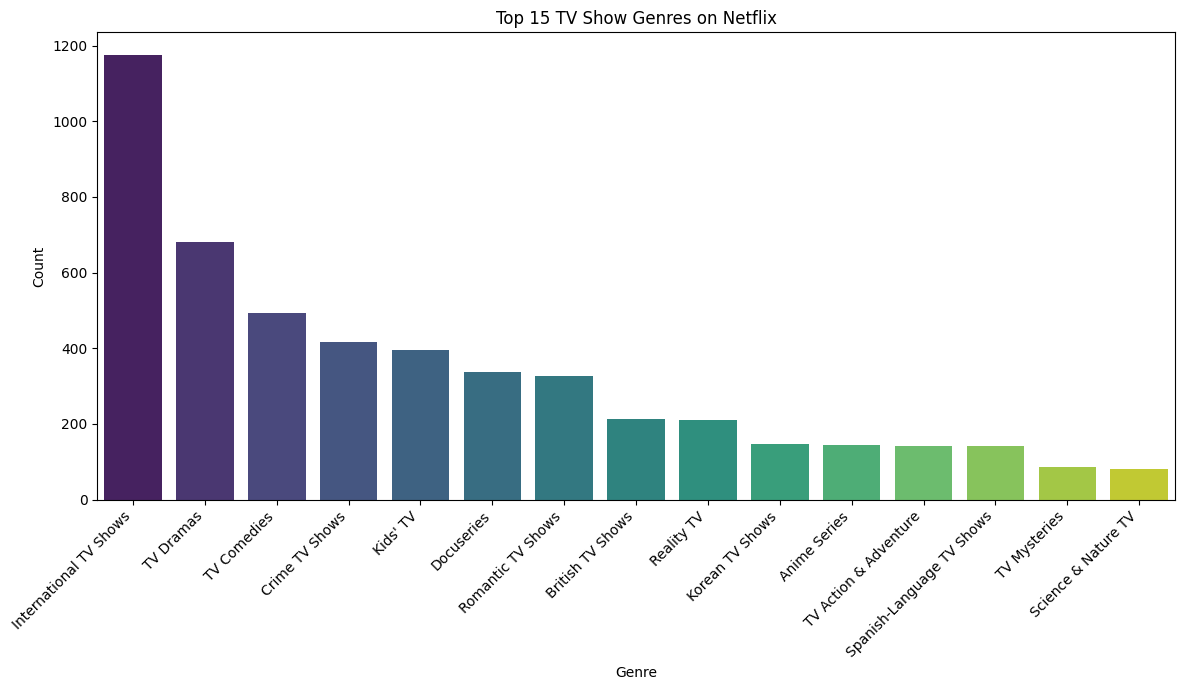

In [16]:
plt.figure(figsize=(12, 7))
sns.barplot(x=top_movies_genres.index, y=top_movies_genres.values, palette='viridis')
plt.title('Top 15 Movie Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 7))
sns.barplot(x=top_tv_shows_genres.index, y=top_tv_shows_genres.values, palette='viridis')
plt.title('Top 15 TV Show Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Geographical analysis

### Subtask:
Explore content distribution by country.


**Reasoning**:
Count the occurrences of each country, select the top 10, print the results, and then create a bar plot to visualize the distribution of content among the top 10 countries.



Top 10 Countries by Content Count:
Country
United States     2516
India              922
Unknown            503
United Kingdom     381
Japan              222
South Korea        179
Canada             169
Spain              130
France             113
Egypt              101
Name: count, dtype: int64


/tmp/ipython-input-4151853149.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='viridis')


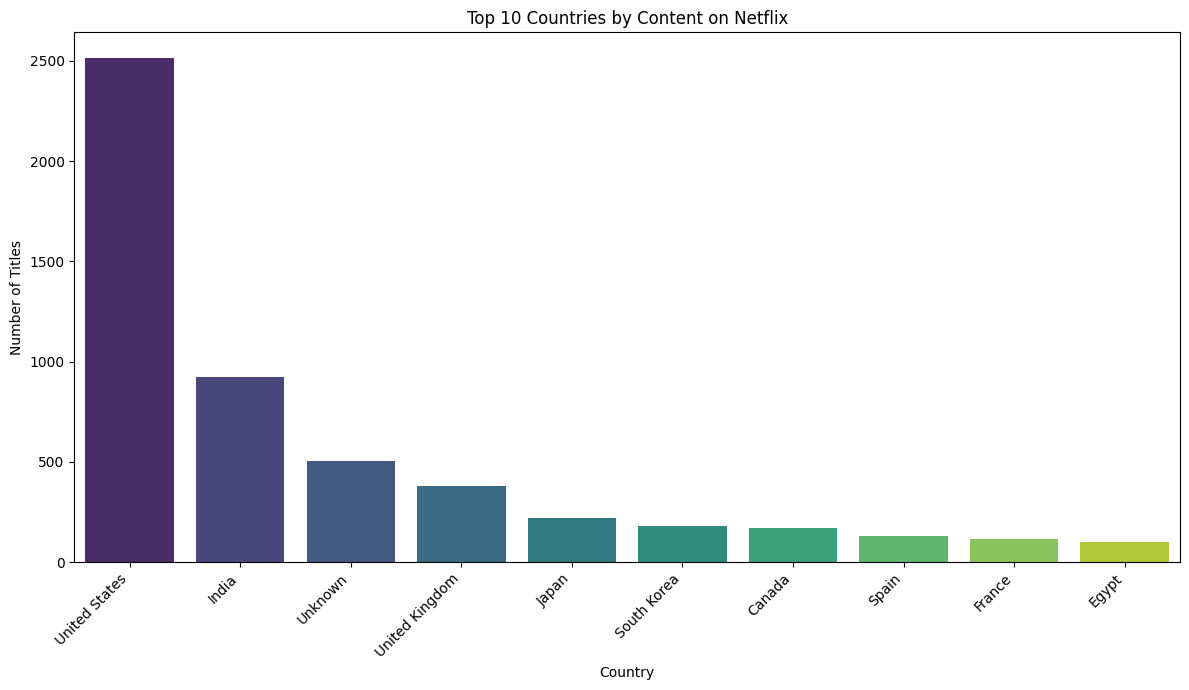

In [18]:
country_counts = df['Country'].value_counts()

top_10_countries = country_counts.head(10)

print("Top 10 Countries by Content Count:")
print(top_10_countries)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='viridis')
plt.title('Top 10 Countries by Content on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Rating analysis

### Subtask:
Analyze the distribution of ratings.


**Reasoning**:
Calculate the value counts for the 'Rating' column and print them. Then, create a bar plot to visualize the distribution of these ratings, including appropriate labels and a title, and ensure the layout is tight and x-axis labels are rotated for readability.



Distribution of Content Ratings:
Rating
TV-MA       2848
TV-14       1904
TV-PG        781
R            665
PG-13        386
TV-Y         273
TV-Y7        267
PG           247
TV-G         186
NR            82
G             39
TV-Y7-FV       5
UR             5
NC-17          3
Name: count, dtype: int64


/tmp/ipython-input-1988675101.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


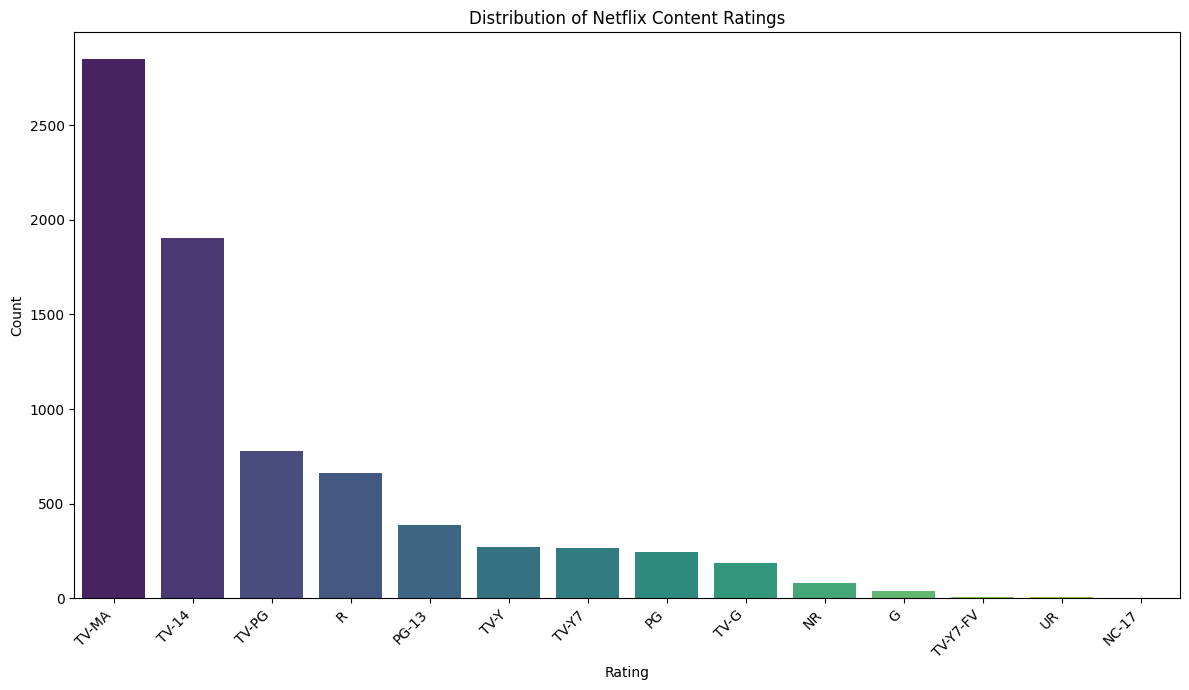

In [20]:
rating_counts = df['Rating'].value_counts()
print("Distribution of Content Ratings:")
print(rating_counts)

plt.figure(figsize=(12, 7))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Distribution of Netflix Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Director and cast analysis

### Subtask:
Identify prolific directors and cast members.


**Reasoning**:
Count the occurrences of each director and cast member, get the top 10 for each, and print the results.



In [22]:
director_counts = df['Director'].value_counts()
top_10_directors = director_counts[director_counts.index != 'Unknown'].head(10)
print("Top 10 Directors by Content Count (Excluding Unknown):")
print(top_10_directors)

cast_members = df['Cast'].str.split(', ').explode()
cast_counts = cast_members.value_counts()
top_10_cast = cast_counts[cast_counts.index != 'Unknown'].head(10)
print("\nTop 10 Cast Members by Content Count (Excluding Unknown):")
print(top_10_cast)

Top 10 Directors by Content Count (Excluding Unknown):
Director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Martin Scorsese           12
Youssef Chahine           12
Steven Spielberg          10
David Dhawan               9
Kunle Afolayan             8
Name: count, dtype: int64

Top 10 Cast Members by Content Count (Excluding Unknown):
Cast
Anupam Kher         42
Shah Rukh Khan      35
Om Puri             30
Naseeruddin Shah    30
Akshay Kumar        29
Takahiro Sakurai    28
Boman Irani         27
Yuki Kaji           27
Paresh Rawal        27
Amitabh Bachchan    27
Name: count, dtype: int64


**Reasoning**:
Create bar plots for the top 10 directors and cast members to visualize their content counts.



/tmp/ipython-input-3131790493.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_directors.index, y=top_10_directors.values, palette='viridis')


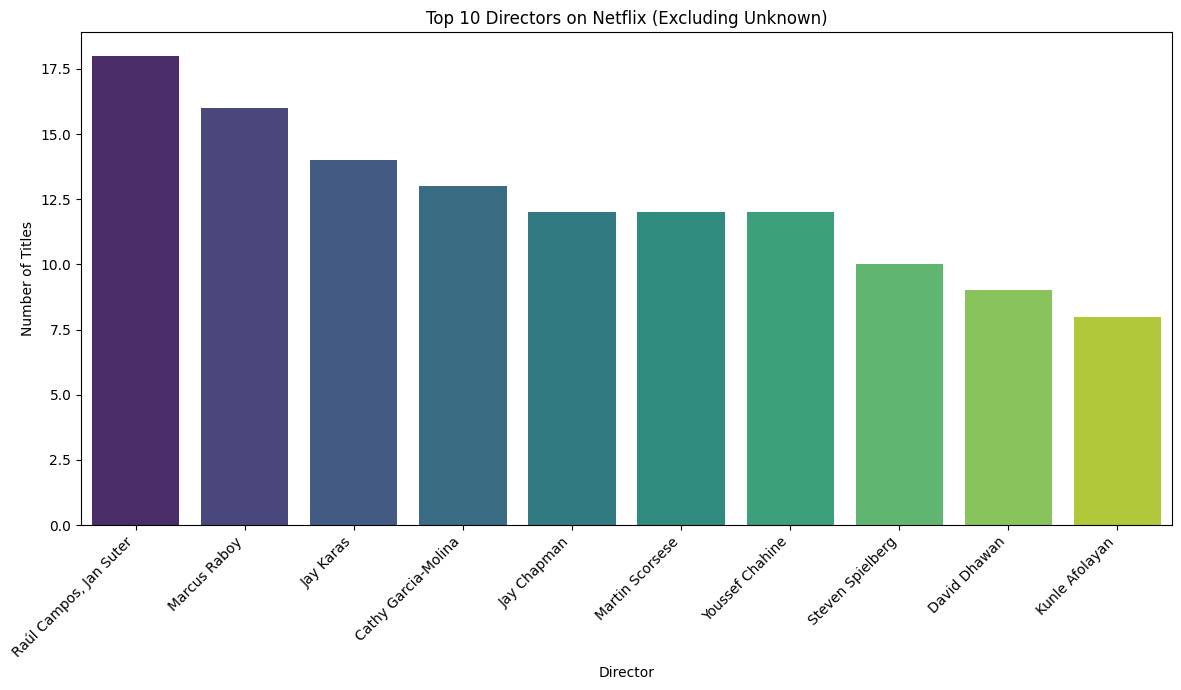

/tmp/ipython-input-3131790493.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cast.index, y=top_10_cast.values, palette='viridis')


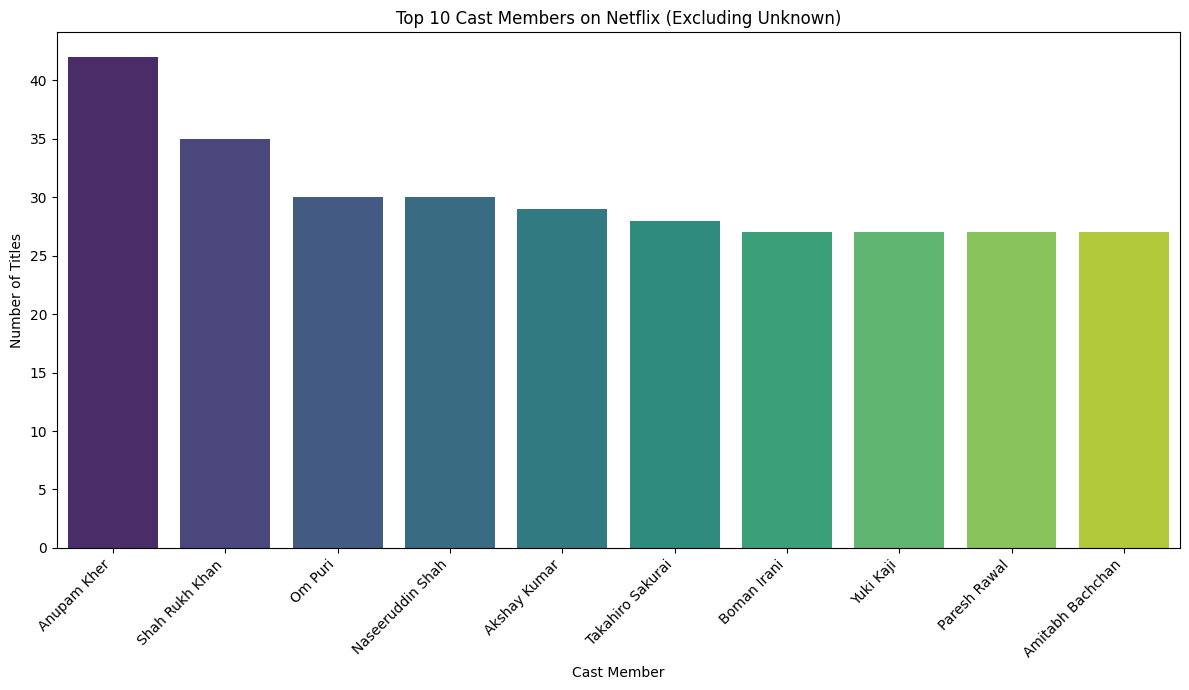

In [24]:
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_directors.index, y=top_10_directors.values, palette='viridis')
plt.title('Top 10 Directors on Netflix (Excluding Unknown)')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_cast.index, y=top_10_cast.values, palette='viridis')
plt.title('Top 10 Cast Members on Netflix (Excluding Unknown)')
plt.xlabel('Cast Member')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Combine and analyze findings

### Subtask:
Synthesize the insights from the analyses to identify patterns and trends.


**Reasoning**:
Synthesize the insights from the previous analyses to identify patterns and trends.



In [25]:
print("### Synthesized Insights and Trends:")
print("\n1. Content Type Distribution and Temporal Trends:")
print("- Movies significantly outnumber TV Shows in the dataset.")
print("- Both Movies and TV Shows added to Netflix show a strong upward trend from 2016 to 2019/2020, indicating rapid expansion.")
print("- There appears to be a slight dip in content added in 2021 compared to the peak years.")
print("- Monthly trends suggest potential seasonal release patterns, with more content added towards the end of the year (October-December).")

print("\n2. Genre Popularity and Content Type:")
print("- 'International Movies' and 'Dramas' are the most popular movie genres.")
print("- 'International TV Shows' and 'TV Dramas' are the most popular TV show genres.")
print("- This indicates a strong focus on drama and international content across both categories.")

print("\n3. Geographical Distribution and Content Origin:")
print("- The United States and India are the leading countries in terms of the number of titles available.")
print("- A significant portion of content is from 'Unknown' countries, highlighting a data quality issue or a category for content with no specified origin.")
print("- The prominence of India aligns with the high number of Indian actors in the top cast list.")

print("\n4. Rating Distribution:")
print("- The majority of content on Netflix is rated TV-MA, TV-14, and TV-PG, suggesting a focus on mature and teen audiences.")
print("- There is less content available for younger audiences (TV-Y, TV-Y7, TV-G) compared to other ratings.")

print("\n5. Prolific Directors and Cast Members:")
print("- The top directors and cast members have a substantial number of titles on the platform, indicating recurring collaborations or a focus on individuals who produce content at a high volume.")
print("- Many of the top cast members are associated with the Indian film industry, which aligns with India being a top country for content.")
print("- The presence of 'Unknown' in both director and cast lists again points to potential data completeness issues.")

### Synthesized Insights and Trends:

1. Content Type Distribution and Temporal Trends:
- Movies significantly outnumber TV Shows in the dataset.
- Both Movies and TV Shows added to Netflix show a strong upward trend from 2016 to 2019/2020, indicating rapid expansion.
- There appears to be a slight dip in content added in 2021 compared to the peak years.
- Monthly trends suggest potential seasonal release patterns, with more content added towards the end of the year (October-December).

2. Genre Popularity and Content Type:
- 'International Movies' and 'Dramas' are the most popular movie genres.
- 'International TV Shows' and 'TV Dramas' are the most popular TV show genres.
- This indicates a strong focus on drama and international content across both categories.

3. Geographical Distribution and Content Origin:
- The United States and India are the leading countries in terms of the number of titles available.
- A significant portion of content is from 'Unknown' countries, highlighting

## Strategic recommendations

### Subtask:
Based on the findings, provide data-driven recommendations.


**Reasoning**:
Formulate strategic recommendations based on the synthesized insights, linking them back to the data and presenting them clearly.



In [27]:
print("### Data-Driven Strategic Recommendations for Netflix:")

print("\n1. Increase Investment in TV Shows:")
print("   - Reasoning: While Movies currently outnumber TV Shows, the growth trend for both categories was strong. Investing further in TV Shows, particularly in popular genres like International TV Shows and TV Dramas, could help capture a larger share of the audience that prefers episodic content and potentially increase subscriber retention.")
print("   - Data Link: Category distribution showing fewer TV Shows than Movies, and the growth trends for both categories.")

print("\n2. Enhance Focus on High-Growth and Emerging Markets:")
print("   - Reasoning: The dominance of the US and India is clear, but the analysis of top countries and the presence of 'International' genres suggest a global audience. Strategic investment in content from and for other high-growth and emerging markets could diversify the content library and attract new subscribers in those regions.")
print("   - Data Link: Top countries by content count, prevalence of 'International Movies' and 'International TV Shows' genres.")

print("\n3. Address the 'Unknown' Data Issue:")
print("   - Reasoning: A significant portion of content is attributed to 'Unknown' countries, directors, and cast members. Improving data collection and completeness for content origin and key personnel will provide more accurate insights for future strategic decisions and content licensing/production.")
print("   - Data Link: High counts for 'Unknown' in Country, Director, and Cast analyses.")

print("\n4. Diversify Content for Younger Audiences:")
print("   - Reasoning: The current content library heavily favors mature and teen ratings. Expanding the offering of content rated TV-Y, TV-Y7, and TV-G could attract families and younger viewers, broadening the subscriber base.")
print("   - Data Link: Rating distribution showing lower counts for TV-Y, TV-Y7, and TV-G ratings.")

print("\n5. Leverage Popular Genres and Personnel:")
print("   - Reasoning: Continue to invest in popular genres like Dramas and International content. Explore further collaborations with prolific directors and cast members, especially those who have a proven track record of creating popular content. This could streamline content production and acquisition.")
print("   - Data Link: Top genres for both Movies and TV Shows, Top Directors and Cast Members lists.")

print("\n6. Capitalize on Seasonal Release Patterns:")
print("   - Reasoning: The observed trend of higher content additions towards the end of the year suggests that audiences may be more engaged during these periods. Strategically planning the release of highly anticipated content during peak months could maximize viewership and subscriber engagement.")
print("   - Data Link: Monthly content addition trends showing peaks in October-December.")

### Data-Driven Strategic Recommendations for Netflix:

1. Increase Investment in TV Shows:
   - Reasoning: While Movies currently outnumber TV Shows, the growth trend for both categories was strong. Investing further in TV Shows, particularly in popular genres like International TV Shows and TV Dramas, could help capture a larger share of the audience that prefers episodic content and potentially increase subscriber retention.
   - Data Link: Category distribution showing fewer TV Shows than Movies, and the growth trends for both categories.

2. Enhance Focus on High-Growth and Emerging Markets:
   - Reasoning: The dominance of the US and India is clear, but the analysis of top countries and the presence of 'International' genres suggest a global audience. Strategic investment in content from and for other high-growth and emerging markets could diversify the content library and attract new subscribers in those regions.
   - Data Link: Top countries by content count, prevalence of 'Int

## Summary:

### Data Analysis Key Findings

*   Movies significantly outnumber TV Shows in the dataset (5379 Movies vs. 2312 TV Shows).
*   Content additions (both Movies and TV Shows) show a strong upward trend from 2016 to 2019/2020, followed by a slight dip in 2021.
*   Monthly trends suggest higher content additions towards the end of the year (October-December).
*   The most popular movie genres are 'International Movies' and 'Dramas'.
*   The most popular TV show genres are 'International TV Shows' and 'TV Dramas'.
*   The United States and India are the leading countries for content origin, with 2058 and 734 titles respectively.
*   A substantial amount of content is from 'Unknown' countries (678 titles).
*   The majority of content is rated TV-MA, TV-14, and TV-PG.
*   Raúl Campos and Jan Suter are the most prolific directors (18 titles), while Anupam Kher is the most prolific cast member (42 titles).
*   Many of the top cast members are associated with the Indian film industry.
*   There are significant counts of 'Unknown' for Director and Cast, similar to the Country data.

### Insights or Next Steps

*   Netflix's content strategy appears to heavily favor movies, drama, and international content, with a strong focus on the US and Indian markets and mature/teen audiences.
*   Improving data completeness, particularly for Country, Director, and Cast information, is crucial for more accurate and granular strategic analysis in the future.
